In [3]:
# !pip3 install zepid
# !pip install forestplot

In [4]:
import pandas as pd
import numpy as np
import pickle
import scipy.stats
import matplotlib.image as mpimg
import numpy as np
import matplotlib.pyplot as plt
import zepid
from zepid.graphics import EffectMeasurePlot
import forestplot as fp

In [5]:
def mean_confidence_interval(data, confidence=0.95):
    a = 1.0 * np.array(data)
    n = len(a)
    m, se = np.mean(a), scipy.stats.sem(a)
    h = se * scipy.stats.t.ppf((1 + confidence) / 2., n-1)
    return m, m-h, m+h

In [7]:
models = ['FCN', '100%', '10%', '30%', '50%', 'specific']
auc_df = []
for model in models:
    auc, _ = pickle.load(open('../SeqModel/CV_result_lstm_18+_'+model+'.sav', 'rb'))#
    auc_df.append(auc)

In [8]:
auc_df = pd.DataFrame(auc_df).T
auc_df.columns = models

In [10]:
fp_df = []
for model in models:
    temp = mean_confidence_interval(auc_df[model].values)
    fp_df.append([model]+[x for x in temp])


In [11]:
auc_df.apply(lambda x: np.max(x) - np.min(x))

FCN         0.047793
100%        0.054029
10%         0.059639
30%         0.056020
50%         0.060652
specific    0.038728
dtype: float64

In [15]:
data = pd.read_csv('../FinalData/DL-18+.csv')

In [16]:
data

,model,auc,new_auc
0,FCN,0.7741,0.7741
1,FCN + LSTM,0.7795,0.7728
2,FCN + LSTM (10%),0.7781,0.7783
3,FCN + LSTM (30%),0.7845,0.7843
4,FCN + LSTM (50%),0.7688,0.7799
5,FCN + LSTM (specific),0.7596,0.7596


In [17]:
fp_df = pd.DataFrame(fp_df, columns=['model', 'mean', 'li', 'ui'])
fp_df['label'] = ['FCN', 'FCN + LSTM', 'FCN + LSTM (10%)', 'FCN + LSTM (30%)', 'FCN + LSTM (50%)', 'FCN + LSTM (asthma specific)']
fp_df['AUC score in hold-out set'] = data.auc.values
fp_df['range'] = fp_df.apply(lambda x: x.ui-x.li, axis=1)


In [18]:
fp_df.range.mean()

0.0233529838291268

In [19]:
fp_df.range.std()

0.001826430252068592

Text(0, 1, 'AUC score (confidence interval) - cross validation')

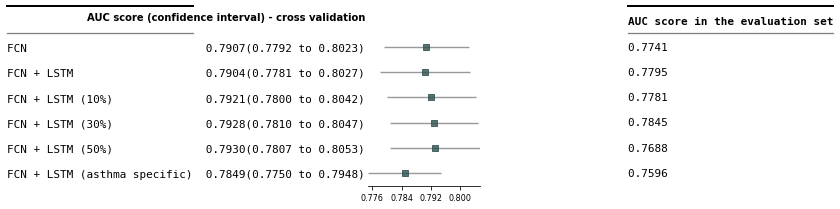

In [30]:
fp.forestplot(fp_df,  # the dataframe with results data
              estimate="mean",  # col containing estimated effect size 
              ll="li", hl="ui",  # columns containing conf. int. lower and higher limits
              varlabel="label",  # column containing variable label
              decimal_precision=4,
              ylabel="",  # y-label title
              figsize=(2,3),
              rightannote=['AUC score in hold-out set'],
              right_annoteheaders=['AUC score in the evaluation set'],
              fontsize = 11,
              table = True
              # xlabel="Pearson correlation"  # x-label title
              )
plt.xticks(fontsize=8)
plt.ylabel('AUC score (confidence interval) - cross validation', loc='top', fontsize=10)

In [65]:
fp_df1

,model,mean,li,ui,label,AUC score in hold-out set,range
0,LR,0.791000,0.777550,0.801100,Linear model,0.7758,0.023550
1,FCN,0.790748,0.779156,0.802340,FCN,0.7741,0.023185
2,100%,0.790416,0.778107,0.802724,FCN + LSTM,0.7795,0.024616
3,10%,0.792104,0.779989,0.804219,FCN + LSTM (10%),0.7781,0.024230
4,30%,0.792811,0.780960,0.804661,FCN + LSTM (30%),0.7845,0.023701
5,50%,0.793038,0.780744,0.805333,FCN + LSTM (50%),0.7688,0.024589
6,specific,0.784858,0.774959,0.794757,FCN + LSTM (asthma specific codes),0.7596,0.019798


In [63]:
fp_df

,model,mean,li,ui,label,AUC score in hold-out set,range
0,FCN,0.790748,0.779156,0.802340,FCN,0.7741,0.023185
1,100%,0.790416,0.778107,0.802724,FCN + LSTM,0.7795,0.024616
2,10%,0.792104,0.779989,0.804219,FCN + LSTM (10%),0.7781,0.024230
3,30%,0.792811,0.780960,0.804661,FCN + LSTM (30%),0.7845,0.023701
4,50%,0.793038,0.780744,0.805333,FCN + LSTM (50%),0.7688,0.024589
5,specific,0.784858,0.774959,0.794757,FCN + LSTM (asthma specific),0.7596,0.019798


In [64]:
fp_df1 = pd.read_csv('../FinalData/forestPlotIwithLR.csv')

Text(0, 1, 'AUC score (confidence interval) - cross validation')

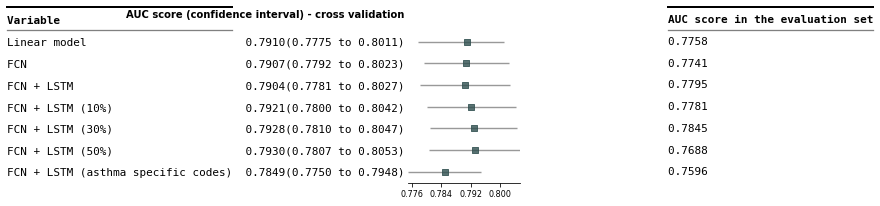

In [71]:
fp.forestplot(fp_df1,  # the dataframe with results data
              estimate="mean",  # col containing estimated effect size 
              ll="li", hl="ui",  # columns containing conf. int. lower and higher limits
              varlabel="label",  # column containing variable label
              decimal_precision=4,
              ylabel="",  # y-label title
              figsize=(2,3),
              rightannote=['AUC score in hold-out set'],
              right_annoteheaders=['AUC score in the evaluation set'],
              fontsize = 11,
              table = True,
              )
plt.xticks(fontsize=8)
plt.ylabel('AUC score (confidence interval) - cross validation', loc='top', fontsize=10)

(array([0.768, 0.776, 0.784, 0.792, 0.8  , 0.808]),
 [Text(0.768, 0, '0.768'),
  Text(0.776, 0, '0.776'),
  Text(0.784, 0, '0.784'),
  Text(0.792, 0, '0.792'),
  Text(0.8, 0, '0.800'),
  Text(0.808, 0, '0.808')])

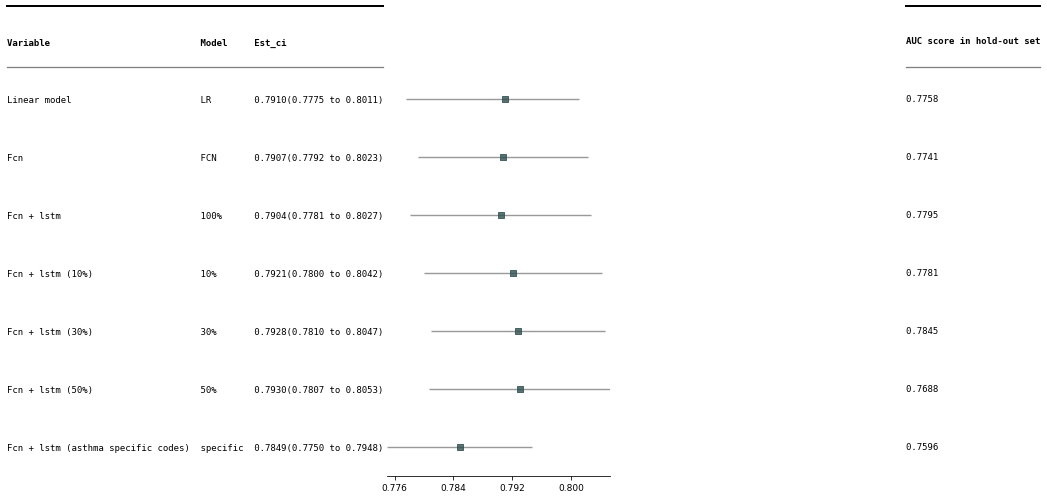

In [57]:
fp.forestplot(fp_df1,  # the dataframe with results data
              estimate="mean",  # col containing estimated effect size 
              ll="li", hl="ui",  # columns containing conf. int. lower and higher limits
              varlabel="label",  # column containing variable label
              decimal_precision=4,
              capitalize="capitalize",
              # figsize=(3,5),
              annote=['model', 'est_ci'],
              annoteheaders=['Model', 'Est_ci'],
              rightannote=['AUC score in hold-out set'],
              right_annoteheaders=['AUC score in hold-out set'],
              fontsize = 9,
              table = True,
              # xlabel="Pearson correlation"  # x-label title
              )
plt.xticks(fontsize=9)
# plt.ylabel('AUC score (confidence interval) - cross validation', loc='top', fontsize=9)

<Axes: >

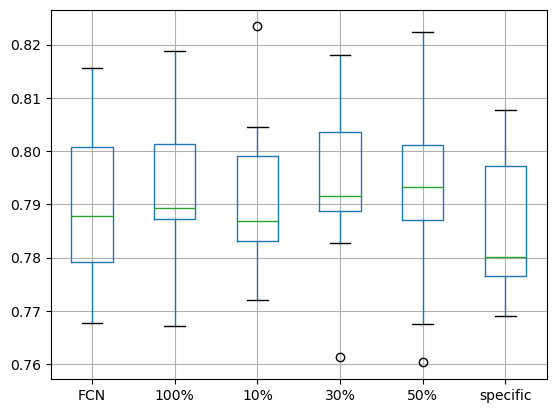

In [98]:
auc_df.boxplot()

{'whiskers': [<matplotlib.lines.Line2D at 0x151b3e2524d0>,
 'caps': [<matplotlib.lines.Line2D at 0x151b3e252a10>,
 'boxes': [<matplotlib.lines.Line2D at 0x151b3e252230>,
 'medians': [<matplotlib.lines.Line2D at 0x151b3e252f50>,
 'fliers': [<matplotlib.lines.Line2D at 0x151b3e2531f0>,
 'means': []}

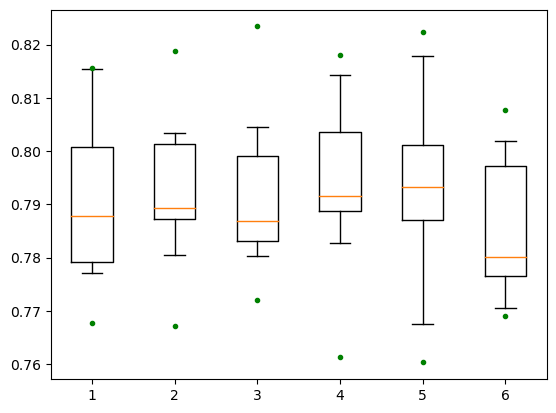

In [76]:
plt.boxplot(auc_df, 0, 'g.', whis=[0.5, 99.5])

In [47]:
result = [x for x in mean_confidence_interval(auc)]
result = ['lstm'] + result

In [50]:
result = pd.DataFrame([result], columns=['model','mean', 'lc', 'uc'])

In [51]:
result

,model,mean,lc,uc
0,lstm,0.792363,0.782311,0.802416


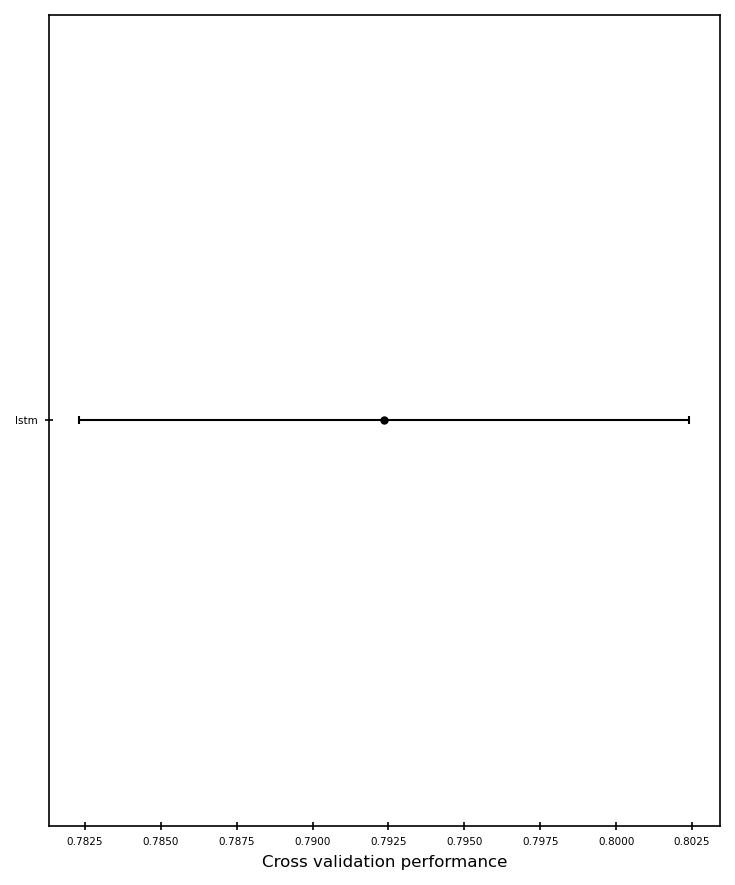

In [59]:
plt.figure(figsize=(5, 6), dpi=150)
ci = [result.iloc[::-1]['mean'] - result.iloc[::-1]['lc'].values, result.iloc[::-1]['uc'].values - result.iloc[::-1]['mean']]
plt.errorbar(x=result.iloc[::-1]['mean'], y=result.iloc[::-1].model.values, xerr=ci,
            color='black',  capsize=2, linestyle='None', elinewidth=1,
            marker='o', markersize=3, mfc="black", mec="black",barsabove=True,
            lolims=.7)
# plt.axvline(x=1, linewidth=0.8, linestyle='--', color='black')
# plt.xlim(0.7, 0.9)
plt.tick_params(direction='inout', axis='both', which='major', labelsize=5)
plt.xlabel('Cross validation performance', fontsize=8)
plt.tight_layout()

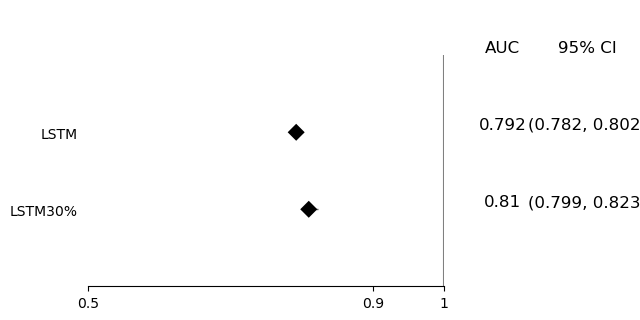

In [34]:

labs = ['LSTM', 'LSTM30%']
measure = [0.7923634350299835, 0.810]
lower = [0.7823105472504817, 0.7988]
upper = [0.8024163228094854, 0.8231]
p = EffectMeasurePlot(label=labs, effect_measure=measure, lcl=lower, ucl=upper)
p.labels(effectmeasure='AUC')
p.colors(pointshape="D")
ax=p.plot(figsize=(7,3), t_adjuster=0.2, max_value=.9, min_value=0.5 )
# plt.title("Random Effect Model(Risk Ratio)",loc="right",x=1, y=1.045)
# plt.suptitle("Missing Data Imputation Method",x=-0.1,y=0.98)
# ax.set_xlabel("Favours Control      Favours Haloperidol       ", fontsize=10)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(False)
# plt.savefig("Missing Data Imputation Method",bbox_inches='tight')

In [ ]:
# meta-analysis and forest plot
results = combine_effects(mean_effect, var_effect, method_re="chi2", use_t=True, row_names=idx)
print(results.summary_frame())
fig = results.plot_forest()